In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1:  
Using the standard linear algebra method of this Section, 
fit the straight line y = mx + b to the x, y, and σy values
for data points 5 through 20 in Table 1 on page 6. That is,
ignore the first four data points, and also ignore the columns
for σx and ρxy. Make a plot showing the points, their
uncertainties, and the best-fit line. Your plot should end up
looking like Figure 1. What is the standard uncertainty
variance σm2 on the slope of the line?

In [4]:
# ID, x, y, s_y, s_x, r_xy
Table1 = np.array([[1,  201, 592, 61, 9,  -0.84],
[2,  244, 401, 25, 4,  0.31],
[3,  47,  583, 38, 11, 0.64],
[4,  287, 402, 15, 7,  -0.27],
[5,  203, 495, 21, 5,  -0.33],
[6,  58,  173, 15, 9,  0.67],
[7,  210, 479, 27, 4,  -0.02],
[8,  202, 504, 14, 4,  -0.05],
[9,  198, 510, 30, 11, -0.84],
[10, 158, 416, 16, 7,  -0.69],
[11, 165, 393, 14, 5,  0.30],
[12, 201, 442, 25, 5,  -0.46],
[13, 157, 317, 52, 5,  -0.03],
[14, 131, 311, 16, 6,  0.50],
[15, 166, 400, 34, 6,  0.73],
[16, 160, 337, 31, 5,  -0.52],
[17, 186, 423, 42, 9,  0.90],
[18, 125, 334, 26, 8,  0.40],
[19, 218, 533, 16, 6,  -0.78],
[20, 146, 344, 22, 5,  -0.56]])

In [5]:
x = Table1[4:,1]
y = Table1[4:,2]
sy = Table1[4:,3]
sx = Table1[4:,4]
rxy = Table1[4:,5]

A = np.c_[x/x,x]

C = np.eye(sy.size)*(sy**2)

Fitting a straight line:   
    $y = mx + b$

m=2.2399208316310926,b=34.047727757542816


(0.0, 700.0)

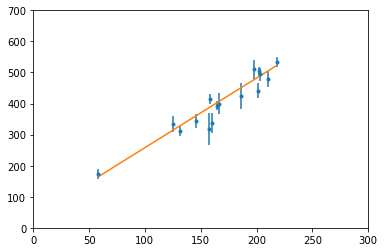

In [6]:


AT_Cinv_A = (A.T).dot(np.linalg.inv(C).dot(A))
AT_Cinv_Y = (A.T).dot(np.linalg.inv(C).dot(y))

b,m =  np.linalg.inv(AT_Cinv_A).dot(AT_Cinv_Y)

print(f'm={m},b={b}')

plt.figure()

plt.errorbar(x,y, yerr=sy, fmt='.')
x = np.sort(x)
plt.plot(x,m*x+b)

plt.xlim(0,300)
plt.ylim(0,700)

### Exercise 2: 
Repeat Exercise 1 but for all the data points in Table 1 on page 6.
Your plot should end up looking like Figure 2. What is the standard
uncertainty variance σm2 on the slope of the line? Is there anything
you don’t like about the result? Is there anything different about
the new points you have included beyond those used in Exercise 1?

(0.0, 700.0)

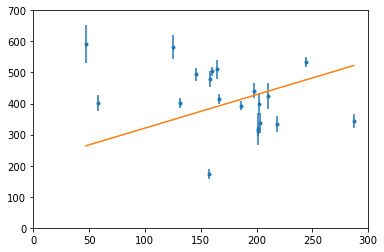

In [92]:
x = Table1[:,1]
y = Table1[:,2]
sy = Table1[:,3]
sx = Table1[:,4]
rxy = Table1[:,5]

A = np.c_[x/x,x]

C = np.eye(sy.size)*(sy**2)

AT_Cinv_A = (A.T).dot(np.linalg.inv(C).dot(A))
AT_Cinv_Y = (A.T).dot(np.linalg.inv(C).dot(y))

b,m =  np.linalg.inv(AT_Cinv_A).dot(AT_Cinv_Y)

plt.figure()
x = np.sort(x)


plt.errorbar(x,y, yerr=sy, fmt='.')
plt.plot(x,m*x+b)

plt.xlim(0,300)
plt.ylim(0,700)

So clearly the fit is now not good. The problem is that the data is
intrinsically non-linaearly distributed.

### Exercise 3: 
Generalize the method of this Section to fit a general quadratic
(second order) relationship. Add another column to matrix $A$
containing the values $x^2_i$ , and another element to vector $X$ (call
it $q$). Then re-do Exercise 1 but fitting for and plotting the best
quadratic relationship $g(x)=qx2 +mx+b$. Your plot should end
up looking like Figure 3.

(0.0, 700.0)

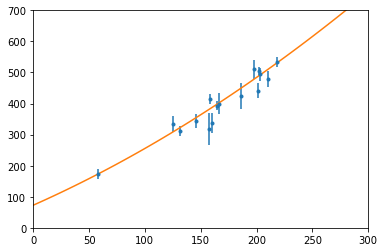

In [95]:
x   = Table1[4:,1]
y   = Table1[4:,2]
sy  = Table1[4:,3]
sx  = Table1[4:,4]
rxy = Table1[4:,5]

A = np.c_[x/x,x, x**2]

C = np.eye(sy.size)*(sy**2)

AT_Cinv_A = (A.T).dot(np.linalg.inv(C).dot(A))
AT_Cinv_Y = (A.T).dot(np.linalg.inv(C).dot(y))

b,m, q =  np.linalg.inv(AT_Cinv_A).dot(AT_Cinv_Y)

plt.figure()

plt.errorbar(x,y, yerr=sy, fmt='.')
x = np.linspace(0,300)
plt.plot(x,q*x**2+m*x+b)


plt.xlim(0,300)
plt.ylim(0,700)